In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.multioutput import MultiOutputClassifier
import  matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def load_dataset(file_path):
    return pd.read_sas(file_path, format="xport")


In [32]:
bp_data= load_dataset("BPXO_L.xpt")
bp_data

,SEQN,BPAOARM,BPAOCSZ,BPXOSY1,BPXODI1,BPXOSY2,BPXODI2,BPXOSY3,BPXODI3,BPXOPLS1,BPXOPLS2,BPXOPLS3
0,130378.0,b'R',4.0,135.0,98.0,131.0,96.0,132.0,94.0,82.0,79.0,82.0
1,130379.0,b'R',4.0,121.0,84.0,117.0,76.0,113.0,76.0,72.0,71.0,73.0
2,130380.0,b'R',4.0,111.0,79.0,112.0,80.0,104.0,76.0,84.0,83.0,77.0
3,130386.0,b'R',4.0,110.0,72.0,120.0,74.0,115.0,75.0,59.0,64.0,64.0
4,130387.0,b'R',4.0,143.0,76.0,136.0,74.0,145.0,78.0,80.0,80.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7796,142306.0,b'R',2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,142307.0,b'R',4.0,127.0,75.0,132.0,73.0,131.0,72.0,71.0,70.0,67.0
7798,142308.0,b'R',3.0,106.0,65.0,106.0,69.0,112.0,74.0,58.0,61.0,69.0
7799,142309.0,b'R',3.0,127.0,81.0,125.0,82.0,128.0,81.0,80.0,79.0,83.0


In [33]:
demo_data= load_dataset("DEMO_L.xpt")
demo_data

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRGND,DMDHRAGZ,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVSTRA,SDMVPSU,INDFMPIR
0,130378.0,12.0,2.0,1.0,43.0,NaN,5.0,6.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,50055.450807,54374.463898,173.0,2.0,5.00
1,130379.0,12.0,2.0,1.0,66.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,29087.450605,34084.721548,173.0,2.0,5.00
2,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,80062.674301,81196.277992,174.0,1.0,1.41
3,130381.0,12.0,2.0,2.0,5.0,NaN,5.0,7.0,1.0,71.0,...,2.0,2.0,2.0,3.0,NaN,38807.268902,55698.607106,182.0,2.0,1.53
4,130382.0,12.0,2.0,1.0,2.0,NaN,3.0,3.0,2.0,34.0,...,2.0,2.0,3.0,1.0,2.0,30607.519774,36434.146346,182.0,2.0,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,12.0,2.0,1.0,9.0,NaN,2.0,2.0,1.0,111.0,...,1.0,3.0,3.0,3.0,NaN,11147.192563,13459.129019,176.0,1.0,2.01
11929,142307.0,12.0,2.0,2.0,49.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,69419.620456,64962.328962,181.0,1.0,NaN
11930,142308.0,12.0,2.0,1.0,50.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,32696.313477,44367.534132,183.0,2.0,1.95
11931,142309.0,12.0,2.0,1.0,40.0,NaN,2.0,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,30547.974564,46249.361849,176.0,1.0,3.11


In [35]:
fertin_data= load_dataset("FERTIN_L.xpt")
fertin_data

,SEQN,WTPH2YR,LBXFER,LBDFERSI
0,130380.0,8.532884e+04,13.30,13.30
1,130381.0,5.397605e-79,NaN,NaN
2,130382.0,5.963893e+04,24.40,24.40
3,130388.0,3.286429e+04,NaN,NaN
4,130390.0,6.142701e+04,52.10,52.10
...,...,...,...,...
2559,142280.0,6.639765e+04,66.40,66.40
2560,142282.0,5.397605e-79,NaN,NaN
2561,142283.0,1.527882e+05,31.60,31.60
2562,142300.0,3.147068e+04,5.69,5.69


In [36]:
insurance_data= load_dataset("HIQ_L.xpt")
# insurance_data = insurance_data.drop(['HIQ032C', 'HIQ032E', 'HIQ032F','HIQ032H','HIQ032I' ], axis=1)
# insurance_data = insurance_data.dropna()
insurance_data

,SEQN,HIQ011,HIQ032A,HIQ032B,HIQ032C,HIQ032D,HIQ032E,HIQ032F,HIQ032H,HIQ032I,HIQ210
0,130378.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
1,130379.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,130380.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,1.0
3,130381.0,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.0
4,130382.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
11928,142306.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11929,142307.0,1.0,NaN,2.0,NaN,4.0,NaN,NaN,NaN,NaN,2.0
11930,142308.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
11931,142309.0,1.0,1.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,2.0


In [37]:
creactive_data= load_dataset("HSCRP_L.xpt")
# creactive_data= creactive_data.dropna()
creactive_data


,SEQN,WTPH2YR,LBXHSCRP,LBDHRPLC
0,130378.0,5.604213e+04,1.78,5.397605e-79
1,130379.0,3.743571e+04,2.03,5.397605e-79
2,130380.0,8.532884e+04,5.62,5.397605e-79
3,130381.0,5.397605e-79,NaN,NaN
4,130382.0,5.963893e+04,NaN,NaN
...,...,...,...,...
8722,142306.0,5.397605e-79,NaN,NaN
8723,142307.0,6.899418e+04,4.30,5.397605e-79
8724,142308.0,5.397605e-79,NaN,NaN
8725,142309.0,4.628442e+04,0.53,5.397605e-79


In [38]:
kidneyCondition_data = load_dataset("KIQ_U_L.xpt")
# kidneyCondition_data = kidneyCondition_data.drop(['KIQ025', 'KIQ010', 'KIQ052'], axis=1)
# kidneyCondition_data = kidneyCondition_data.dropna()
kidneyCondition_data

,SEQN,KIQ022,KIQ025,KIQ005,KIQ010,KIQ042,KIQ044,KIQ052,KIQ481
0,130378.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130379.0,2.0,NaN,2.0,2.0,1.0,2.0,2.0,2.000000e+00
2,130380.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00
3,130384.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,130385.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7804,142305.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7805,142307.0,2.0,NaN,5.0,3.0,1.0,1.0,4.0,5.397605e-79
7806,142308.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,5.397605e-79
7807,142309.0,2.0,NaN,1.0,NaN,2.0,2.0,NaN,2.000000e+00


In [39]:
# kidneyCondition_data.describe()

In [40]:
BDmass_data= load_dataset("BMX_L.xpt")
vitD_data= load_dataset('VID_L.xpt')
Preg_data= load_dataset('UCPREG_L.xpt')
Preg_data

,SEQN,URXPREG
0,130380.0,2.0
1,130388.0,2.0
2,130390.0,2.0
3,130391.0,2.0
4,130395.0,2.0
...,...,...
1129,142208.0,2.0
1130,142263.0,2.0
1131,142269.0,2.0
1132,142280.0,2.0


In [41]:
data= demo_data.merge(fertin_data, on='SEQN')
data= data.merge(creactive_data, on='SEQN')
data= data.merge(kidneyCondition_data, on='SEQN')
data= data.merge(insurance_data, on='SEQN')
data= data.merge(vitD_data, on='SEQN')
data= data.merge(BDmass_data, on='SEQN')
data= data.merge(Preg_data, on='SEQN')
data



,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,URXPREG
0,130380.0,12.0,2.0,2.0,44.0,NaN,2.0,2.0,1.0,NaN,...,NaN,35.5,NaN,36.3,NaN,93.5,NaN,98.0,NaN,2.0
1,130388.0,12.0,2.0,2.0,27.0,NaN,4.0,4.0,1.0,NaN,...,NaN,39.5,NaN,45.7,NaN,118.5,NaN,134.0,NaN,2.0
2,130390.0,12.0,2.0,2.0,31.0,NaN,3.0,3.0,2.0,NaN,...,NaN,40.4,NaN,46.0,NaN,131.0,NaN,138.5,NaN,2.0
3,130391.0,12.0,2.0,2.0,33.0,NaN,3.0,3.0,2.0,NaN,...,NaN,38.0,NaN,41.8,NaN,123.8,NaN,138.9,NaN,2.0
4,130395.0,12.0,2.0,2.0,33.0,NaN,5.0,7.0,2.0,NaN,...,NaN,36.0,NaN,45.2,NaN,142.5,NaN,146.1,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,NaN,3.0,3.0,1.0,NaN,...,NaN,36.5,NaN,36.0,NaN,104.4,NaN,110.0,NaN,2.0
1130,142263.0,12.0,2.0,2.0,44.0,NaN,3.0,3.0,2.0,NaN,...,NaN,33.3,NaN,26.3,NaN,80.4,NaN,95.0,NaN,2.0
1131,142269.0,12.0,2.0,2.0,32.0,NaN,4.0,4.0,2.0,NaN,...,NaN,38.0,NaN,53.1,NaN,149.3,NaN,147.2,NaN,2.0
1132,142280.0,12.0,2.0,2.0,23.0,NaN,5.0,7.0,2.0,NaN,...,NaN,39.7,NaN,36.4,NaN,124.1,NaN,130.0,NaN,2.0


In [42]:

data= data.drop_duplicates(subset='SEQN')

In [43]:

data.columns = data.columns.str.strip().str.lower()

In [44]:
missing_percent = data.isnull().mean()
cols_to_drop= missing_percent[missing_percent>0.5].index.tolist()
data= data.drop(columns=cols_to_drop)

In [45]:
data

,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridreth1,ridreth3,ridexmon,dmqmiliz,dmdborn4,...,bmdstats,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,bmxhip,urxpreg
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,NaN,NaN,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [46]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [47]:
num_imputer= SimpleImputer(strategy='median')
data[numeric_cols]= num_imputer.fit_transform(data[numeric_cols])

In [48]:
numeric_cols= data.select_dtypes(include=['int64', 'float64']).columns
num_imputer= SimpleImputer(strategy='median')
data[numeric_cols]= num_imputer.fit_transform(data[numeric_cols])

In [49]:
data

,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridreth1,ridreth3,ridexmon,dmqmiliz,dmdborn4,...,bmdstats,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,bmxhip,urxpreg
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,162.7,28.1,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [50]:
filtered_data= data[data['riagendr']!= 1.0]
filtered_data

,seqn,sddsrvyr,ridstatr,riagendr,ridageyr,ridreth1,ridreth3,ridexmon,dmqmiliz,dmdborn4,...,bmdstats,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,bmxhip,urxpreg
0,130380.0,12.0,2.0,2.0,44.0,2.0,2.0,1.0,2.0,2.0,...,1.0,69.4,152.9,29.7,38.5,35.5,36.3,93.5,98.0,2.0
1,130388.0,12.0,2.0,2.0,27.0,4.0,4.0,1.0,2.0,1.0,...,1.0,123.7,168.2,43.7,40.0,39.5,45.7,118.5,134.0,2.0
2,130390.0,12.0,2.0,2.0,31.0,3.0,3.0,2.0,1.0,1.0,...,1.0,122.7,163.3,46.0,34.0,40.4,46.0,131.0,138.5,2.0
3,130391.0,12.0,2.0,2.0,33.0,3.0,3.0,2.0,2.0,1.0,...,1.0,116.3,172.8,38.9,35.6,38.0,41.8,123.8,138.9,2.0
4,130395.0,12.0,2.0,2.0,33.0,5.0,7.0,2.0,2.0,1.0,...,1.0,138.4,159.2,54.6,36.2,36.0,45.2,142.5,146.1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,142208.0,12.0,2.0,2.0,28.0,3.0,3.0,1.0,2.0,1.0,...,1.0,88.1,159.0,34.8,35.5,36.5,36.0,104.4,110.0,2.0
1130,142263.0,12.0,2.0,2.0,44.0,3.0,3.0,2.0,2.0,1.0,...,1.0,61.3,164.8,22.6,37.0,33.3,26.3,80.4,95.0,2.0
1131,142269.0,12.0,2.0,2.0,32.0,4.0,4.0,2.0,2.0,1.0,...,3.0,152.4,162.7,28.1,39.5,38.0,53.1,149.3,147.2,2.0
1132,142280.0,12.0,2.0,2.0,23.0,5.0,7.0,2.0,2.0,1.0,...,1.0,112.9,171.4,38.4,41.6,39.7,36.4,124.1,130.0,2.0


In [51]:


filtered_data.columns

x= filtered_data.drop(columns=['hiq011','hiq032a','hiq210'])
y= filtered_data[['hiq011','hiq032a', 'hiq210']]
print("printing x values")
print(x)
print("printing y values")
print(y)

data.sum()


printing x values
          seqn  sddsrvyr  ridstatr  riagendr  ridageyr  ridreth1  ridreth3  \
0     130380.0      12.0       2.0       2.0      44.0       2.0       2.0   
1     130388.0      12.0       2.0       2.0      27.0       4.0       4.0   
2     130390.0      12.0       2.0       2.0      31.0       3.0       3.0   
3     130391.0      12.0       2.0       2.0      33.0       3.0       3.0   
4     130395.0      12.0       2.0       2.0      33.0       5.0       7.0   
...        ...       ...       ...       ...       ...       ...       ...   
1129  142208.0      12.0       2.0       2.0      28.0       3.0       3.0   
1130  142263.0      12.0       2.0       2.0      44.0       3.0       3.0   
1131  142269.0      12.0       2.0       2.0      32.0       4.0       4.0   
1132  142280.0      12.0       2.0       2.0      23.0       5.0       7.0   
1133  142283.0      12.0       2.0       2.0      29.0       5.0       7.0   

      ridexmon  dmqmiliz  dmdborn4  ...  bmds

seqn         1.547371e+08
sddsrvyr     1.360800e+04
ridstatr     2.268000e+03
riagendr     2.268000e+03
ridageyr     3.756100e+04
ridreth1     3.514000e+03
ridreth3     3.739000e+03
ridexmon     1.710000e+03
dmqmiliz     2.243000e+03
dmdborn4     1.387000e+03
dmdeduc2     4.577000e+03
dmdmartz     2.193000e+03
ridexprg     2.255000e+03
dmdhhsiz     3.721000e+03
wtint2yr     4.181708e+07
wtmec2yr     5.497164e+07
sdmvstra     2.042810e+05
sdmvpsu      1.721000e+03
indfmpir     2.872350e+03
wtph2yr_x    5.487146e+07
lbxfer       7.084888e+04
lbdfersi     7.084888e+04
wtph2yr_y    5.487146e+07
lbxhscrp     5.322110e+03
lbdhrplc     9.000000e+00
kiq022       2.253000e+03
kiq005       1.820000e+03
kiq042       1.871000e+03
kiq044       2.033000e+03
kiq481       1.366000e+03
hiq011       1.263000e+03
hiq032a      2.854000e+03
hiq210       2.196000e+03
wtph2yr      5.487146e+07
lbxvidms     7.660133e+04
lbdvidlc     6.120884e-76
lbxvd2ms     4.529180e+03
lbdvd2lc     8.480000e+02
lbxvd3ms    

In [52]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)

poly= PolynomialFeatures(degree=2, include_bias=False)
x_poly= poly.fit_transform(x_scaled)

In [53]:
x_train, x_test, y_train, y_test= train_test_split(x_poly,y, test_size=0.3, random_state=0)

print(x_train, y_train)

[[-1.10250988  0.          0.         ...  0.07550191  0.03420832
   0.01549907]
 [ 1.07491117  0.          0.         ...  0.63897729 -0.0995166
   0.01549907]
 [ 1.29902722  0.          0.         ...  0.88522429 -0.11713306
   0.01549907]
 ...
 [ 0.81407886  0.          0.         ...  0.13103498 -0.04506573
   0.01549907]
 [ 0.02835091  0.          0.         ...  0.07395145 -0.03385526
   0.01549907]
 [ 0.38905144  0.          0.         ...  0.03793016 -0.02424628
   0.01549907]]       hiq011  hiq032a  hiq210
215      1.0      1.0     2.0
921      1.0      1.0     2.0
1009     1.0      1.0     2.0
486      1.0      1.0     2.0
960      1.0      1.0     2.0
...      ...      ...     ...
1033     1.0      1.0     2.0
763      1.0      1.0     2.0
835      1.0      1.0     2.0
559      2.0      1.0     2.0
684      1.0      1.0     2.0

[793 rows x 3 columns]


In [54]:
# model= RandomForestRegressor(n_estimators= 100, random_state=42)
# model.fit(x_train, y_train)


In [55]:
# predictions= model.predict(x_test)
# mse= mean_squared_error(y_test,predictions)
# # print("Mean Sqaured Error on test set:",mse)

In [56]:
base_model= LogisticRegression(max_iter=1000)
model= MultiOutputClassifier(base_model)
model.fit(x_train,y_train)

y_pred= model.predict(x_test)

# print("Accuracy:", accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))


In [57]:
# y_pred= model.predict(x_test)
print("🔍 Accuracy per target label:")
for i, col in enumerate(y.columns):
    acc = accuracy_score(y_test[col], y_pred[:, i])
    print(f"{col}: {acc:.4f}")

for i, col in enumerate(y.columns):
    print(f"\n📊 Classification report for {col}:")
    print(classification_report(y_test[col], y_pred[:, i], zero_division=1))

🔍 Accuracy per target label:
hiq011: 0.8152
hiq032a: 0.9736
hiq210: 0.8974

📊 Classification report for hiq011:
              precision    recall  f1-score   support

         1.0       0.89      0.90      0.90       303
         2.0       0.16      0.16      0.16        37
         9.0       1.00      0.00      0.00         1

    accuracy                           0.82       341
   macro avg       0.69      0.35      0.35       341
weighted avg       0.82      0.82      0.81       341


📊 Classification report for hiq032a:
              precision    recall  f1-score   support

         1.0       0.97      1.00      0.99       332
        77.0       1.00      0.00      0.00         2
        99.0       1.00      0.00      0.00         7

    accuracy                           0.97       341
   macro avg       0.99      0.33      0.33       341
weighted avg       0.97      0.97      0.96       341


📊 Classification report for hiq210:
              precision    recall  f1-score   suppo

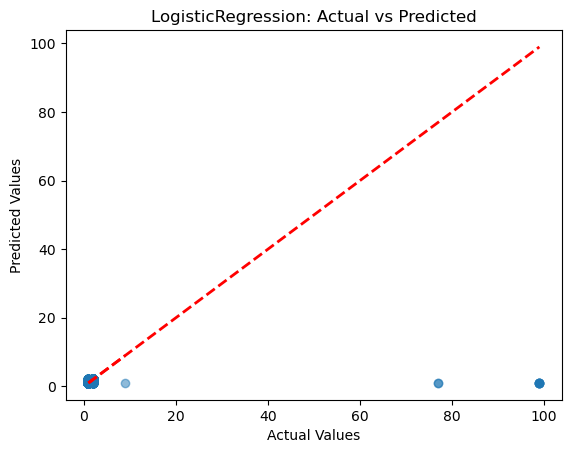

In [58]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("LogisticRegression: Actual vs Predicted")
plt.show()

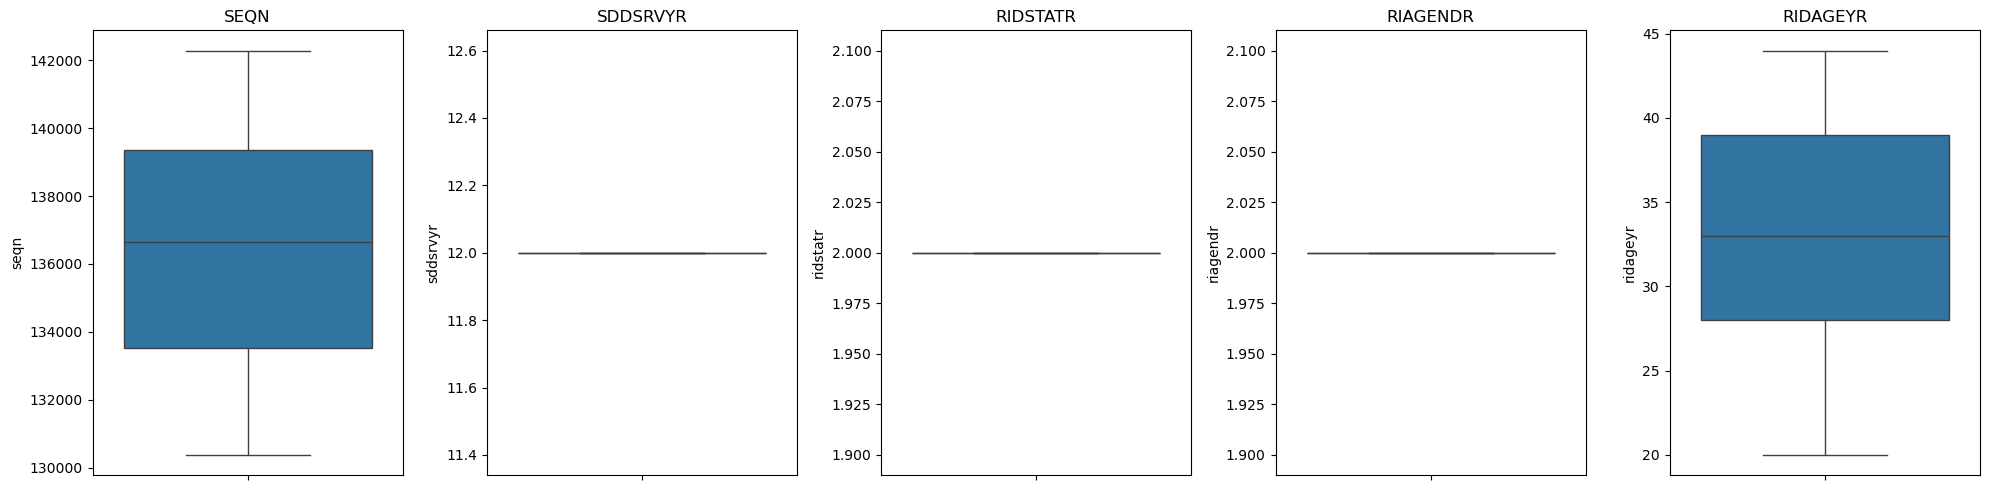

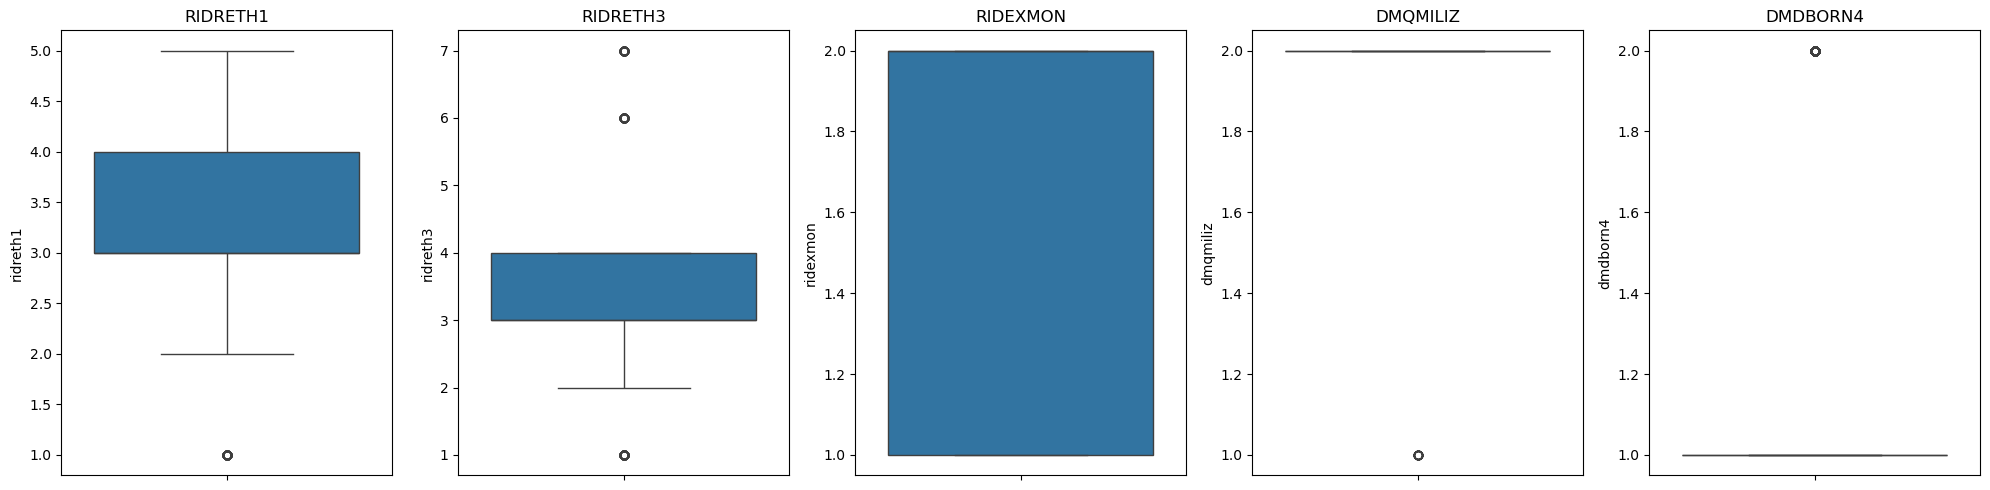

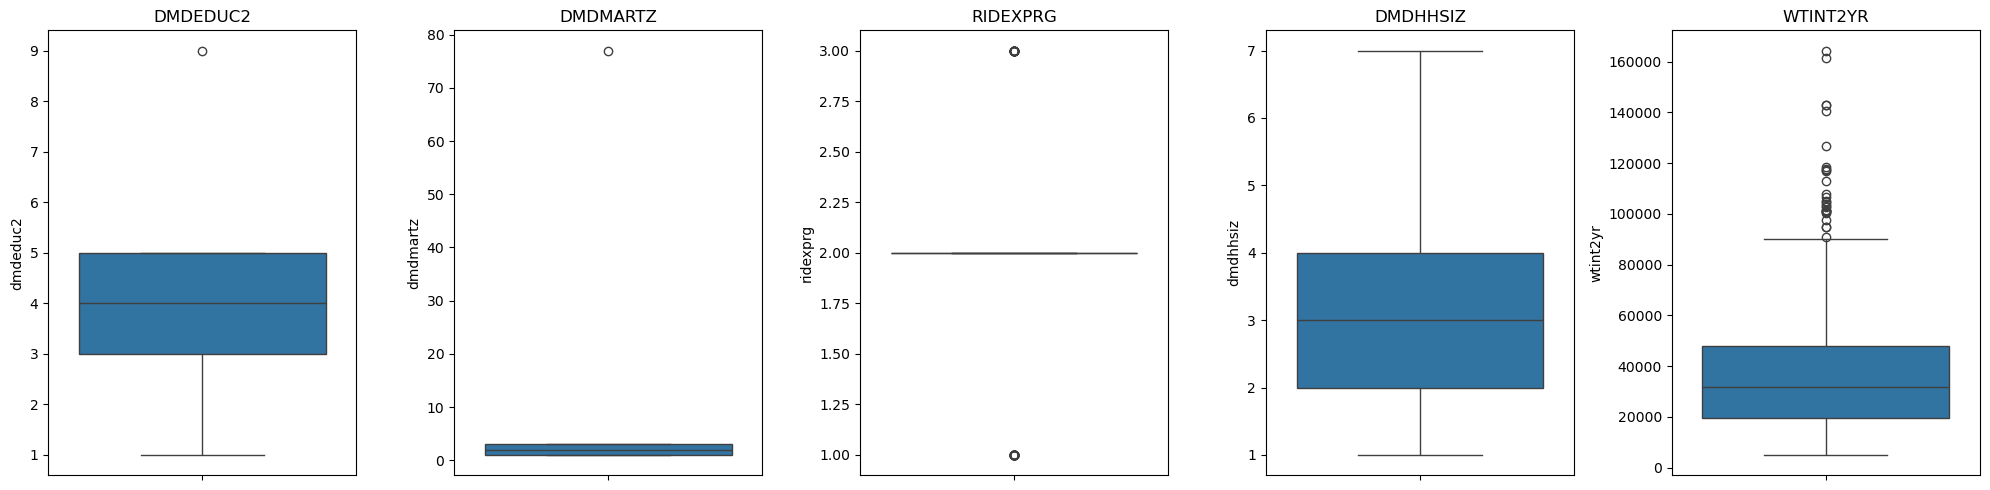

In [ ]:
# Step 2: Select only numeric columns
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Step 3: Plot in batches to avoid overcrowding
batch_size = 5
num_batches = len(numeric_features) // batch_size + (len(numeric_features) % batch_size != 0)

for batch in range(num_batches):
    start = batch * batch_size
    end = start + batch_size
    features_batch = numeric_features[start:end]

    plt.figure(figsize=(20, 5))
    for i, feature in enumerate(features_batch):
        plt.subplot(1, len(features_batch), i + 1)
        sns.boxplot(y=x[feature])
        plt.title(feature.upper())
        plt.tight_layout()
    plt.show()